In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
dataset=pd.read_csv(r'C:\Users\hp\Desktop\SLR\ice_cream_sales.csv')

In [4]:
dataset

,Temperature (°C),Ice Cream Sales (Units)
0,15,40
1,18,48
2,20,55
3,22,65
4,25,80
5,28,95
6,30,120
7,32,150
8,35,180
9,38,220


In [5]:
X = dataset.iloc[:, 0:1].values

In [6]:
X

array([[15],
       [18],
       [20],
       [22],
       [25],
       [28],
       [30],
       [32],
       [35],
       [38]])

In [7]:
y = dataset.iloc[:, 1:2].values

In [8]:
y

array([[ 40],
       [ 48],
       [ 55],
       [ 65],
       [ 80],
       [ 95],
       [120],
       [150],
       [180],
       [220]])

In [9]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
X1=imputer.fit_transform(X)
y1=imputer.fit_transform(y)

In [10]:
y1

array([[ 40.],
       [ 48.],
       [ 55.],
       [ 65.],
       [ 80.],
       [ 95.],
       [120.],
       [150.],
       [180.],
       [220.]])

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.3, random_state=0)

In [12]:
y_train

array([[220.],
       [ 48.],
       [120.],
       [150.],
       [ 65.],
       [ 40.],
       [ 95.]])

In [14]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [15]:
y_pred=regressor.predict(X_test)

In [16]:
y_pred

array([[ 59.1404134 ],
       [172.16963649],
       [ 96.8168211 ]])

In [17]:
y_test

array([[ 55.],
       [180.],
       [ 80.]])

In [18]:
regressor.score(X1,y1)

0.9326871514043139

In [19]:
predo=regressor.predict([[1.1]])

In [20]:
predo

array([[-83.2764077]])

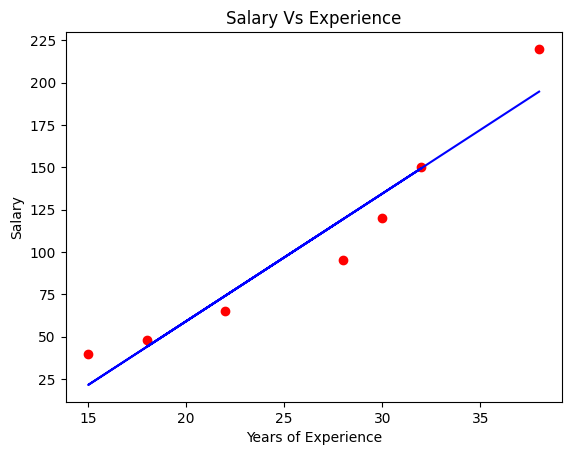

In [21]:
plt.scatter(X_train,y_train, color="red")
plt.plot(X_train,regressor.predict(X_train),color="blue")
plt.title("Salary Vs Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

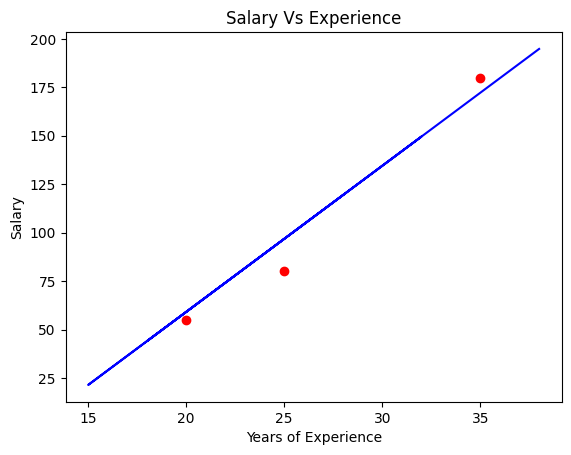

In [22]:
plt.scatter(X_test,y_test, color="red")
plt.plot(X_train,regressor.predict(X_train),color="blue")
plt.title("Salary Vs Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [23]:
import numpy as np
import pandas as pd
import pickle
from sklearn.linear_model import LinearRegression

# Define your dataset
data = {
    "Size (sq ft)": [850, 900, 1100, 1200, 1350, 1500, 1600, 1750, 1850, 2000],
    "Price ($)": [150000, 165000, 180000, 195000, 210000, 230000, 250000, 270000, 290000, 310000]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Prepare training data
X = df[["Size (sq ft)"]]
y = df["Price ($)"]

# Train model
model = LinearRegression()
model.fit(X, y)

# Save model to a file
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model trained and saved as 'model.pkl'")


Model trained and saved as 'model.pkl'


In [25]:
from flask import Flask, request, jsonify, render_template
import pickle
import numpy as np

app = Flask(__name__)

# Load trained model
with open("model.pkl", "rb") as file:
    model = pickle.load(file)

@app.route("/")
def home():
    return render_template("index.html")

@app.route("/predict", methods=["POST"])
def predict():
    try:
        # Get input value
        input_value = float(request.form["size"])
        prediction = model.predict(np.array([[input_value]]))[0]
        return jsonify({"predicted_price": round(prediction, 2)})
    except Exception as e:
        return jsonify({"error": str(e)})

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

In [ ]:
import pickle

with open("model.pkl", "wb") as file:
    pickle.dump(model, file)


In [7]:
pip install flask numpy pandas scikit-learn
